#  Loan Prediction: Hypothesis Testing & Supervised Modeling

### Major Project — Machine Learning & Statistical Analysis

This project integrates inferential statistics with supervised machine learning
to analyze financial loan data and predict loan approval status.

----

##  Key Components

- Hypothesis Testing (T-Test, Chi-Square, ANOVA Concept)
- Data Preparation & Encoding
- Feature Selection
- Supervised Classification Modeling
- Model Evaluation & Comparison

##  Problem Statement

Financial institutions must evaluate loan applications efficiently while minimizing risk.

This project applies statistical hypothesis testing to validate relationships between
applicant attributes and loan approval decisions. It then builds supervised machine
learning models to predict loan approval outcomes.

In [1]:
# Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import roc_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    roc_auc_score,
    classification_report
)

##  Data Acquisition

The Loan Prediction dataset contains applicant demographic and financial
information used to predict loan approval status.

In [2]:
# Load dataset

df = pd.read_csv("../dataset/loan_data.csv")

# Display first rows
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


##  Dataset Overview

In [3]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

##  Data Preparation

Handling missing values and preparing dataset for analysis.


###  Removing Identifier Column

Loan_ID is a unique identifier and does not contribute to prediction.


In [4]:
df.drop("Loan_ID", axis=1, inplace=True)

###  Handling Missing Values

In [5]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

df.isnull().sum()

C:\Users\neeli\AppData\Local\Temp\ipykernel_47572\1591004114.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\neeli\AppData\Local\Temp\ipykernel_47572\1591004114.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

###  Encoding Categorical Features

In [6]:
le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


###  Correlation Heatmap

Heatmap is generated to identify relationships between features
and Loan_Status before feature removal.

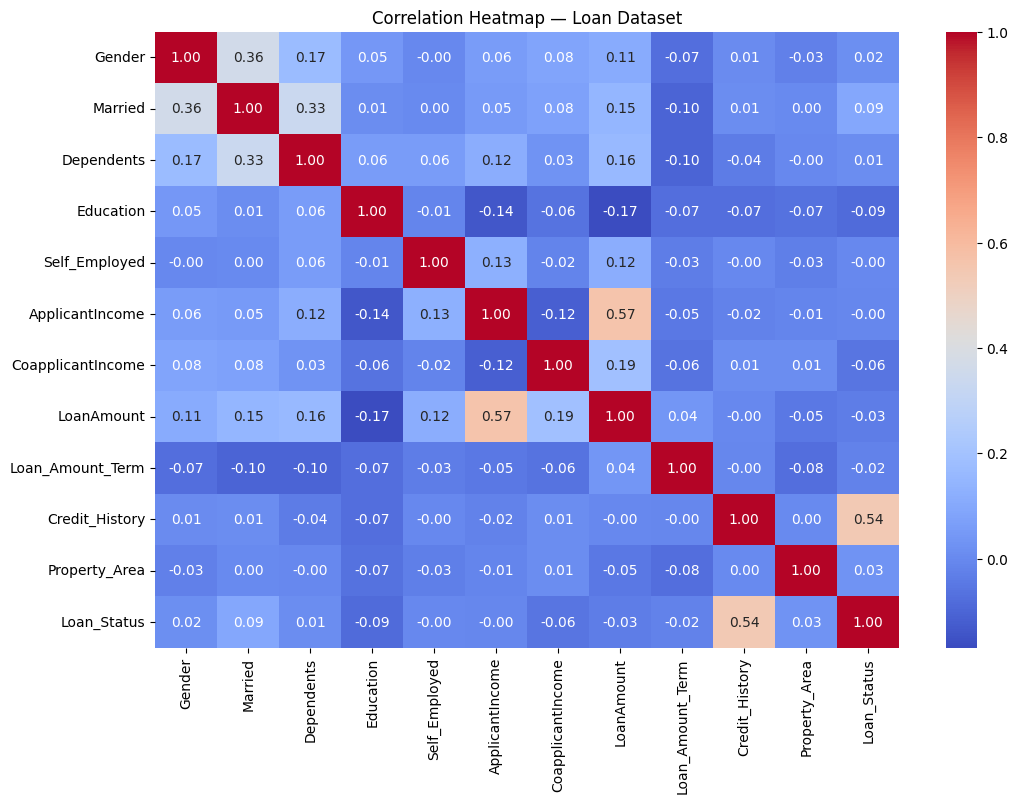

In [7]:
plt.figure(figsize=(12,8))

sns.heatmap(
    df.corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)

plt.title("Correlation Heatmap — Loan Dataset")
plt.show()

###  Correlation Analysis Observations

From the correlation heatmap:

- Credit_History shows the strongest positive correlation (0.54) with Loan_Status.
- ApplicantIncome and LoanAmount show moderate correlation (0.57 between themselves).
- CoapplicantIncome shows weak correlation with Loan_Status (-0.06).
- Gender, Married, Dependents, Education, Self_Employed, Property_Area show very low correlation with Loan_Status.
- Loan_Amount_Term has negligible impact.

Hence, features with extremely low correlation may be removed to reduce noise.


###  Feature Reduction

Based on correlation heatmap analysis:

- CoapplicantIncome and Loan_Amount_Term show negligible correlation with Loan_Status.
- These features contribute minimal predictive value.

Hence, they are removed to improve model performance and reduce noise.

In [8]:
df.drop(
    ["CoapplicantIncome", "Loan_Amount_Term"],
    axis=1,
    inplace=True
)


##  Hypothesis Testing

### T-Test

Compare ApplicantIncome between approved and rejected loans.

H₀: Means equal  
H₁: Means differ

In [9]:
approved = df[df['Loan_Status'] == 1]['ApplicantIncome']
rejected = df[df['Loan_Status'] == 0]['ApplicantIncome']

t_stat, p_value = stats.ttest_ind(approved, rejected)

print("T-Statistic:", t_stat)
print("P-Value:", p_value)

T-Statistic: -0.11650844828724542
P-Value: 0.907287812130518


### Chi-Square Test
Education vs Loan_Status

In [10]:
cont_table = pd.crosstab(
    df['Education'],
    df['Loan_Status']
)

chi2_stat, p, dof, exp = stats.chi2_contingency(cont_table)

print("Chi-Square:", chi2_stat)
print("P-Value:", p)


Chi-Square: 4.091490413303621
P-Value: 0.043099621293573545


### Anova Concept
ANOVA is used when comparing mean values across three or more groups,
such as income brackets vs loan amount.

##  Feature Selection — SelectKBest

In [21]:
X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

selector = SelectKBest(score_func=chi2, k=10)

X_selected = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]

print("Top Features:\n", selected_features)

Top Features:
 Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'LoanAmount', 'Credit_History', 'Property_Area'],
      dtype='object')


c:\Users\neeli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:782: UserWarning: k=10 is greater than n_features=9. All the features will be returned.
  warnings.warn(


##  Train-Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

## Supervised Learning Models

In [13]:
# Logistic Regression Model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

c:\Users\neeli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
# Decision Tree Model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

## Model Evaluation

In [15]:
# Evaluation - Logistic Regression
print("Accuracy:",
      accuracy_score(y_test, y_pred_log))

print("Confusion Matrix:\n",
      confusion_matrix(y_test, y_pred_log))

print("ROC-AUC:",
      roc_auc_score(y_test, y_pred_log))


Accuracy: 0.7886178861788617
Confusion Matrix:
 [[18 25]
 [ 1 79]]
ROC-AUC: 0.7030523255813954


### Logistic Regression ROC Curve

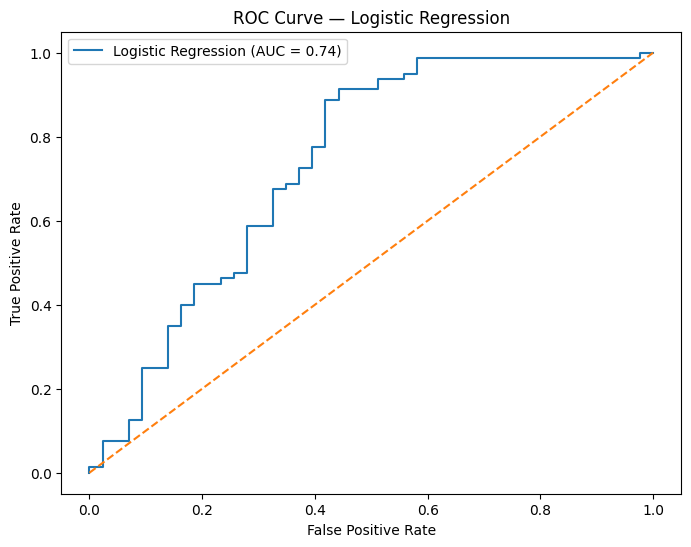

In [18]:
# Get probability scores
y_prob_log = log_model.predict_proba(X_test)[:,1]

# Compute ROC
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)

roc_auc_log = auc(fpr_log, tpr_log)

# Plot
plt.figure(figsize=(8,6))

plt.plot(fpr_log, tpr_log,
         label=f"Logistic Regression (AUC = {roc_auc_log:.2f})")

plt.plot([0,1], [0,1], linestyle="--")  # Random line

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Logistic Regression")
plt.legend()
plt.show()


In [16]:
# Evaluation - Decision Tree
print("Accuracy:",
      accuracy_score(y_test, y_pred_tree))

print("Confusion Matrix:\n",
      confusion_matrix(y_test, y_pred_tree))

print("ROC-AUC:",
      roc_auc_score(y_test, y_pred_tree))

Accuracy: 0.7073170731707317
Confusion Matrix:
 [[20 23]
 [13 67]]
ROC-AUC: 0.6513081395348838


### Decision Tree ROC Curve

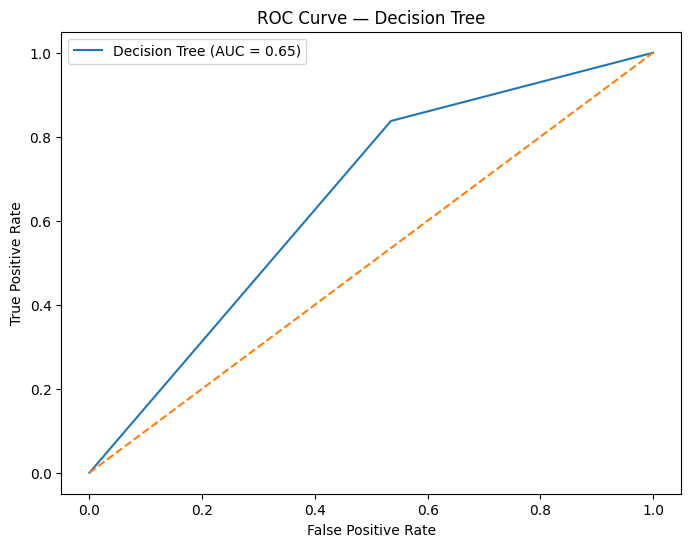

In [19]:
# Probability scores
y_prob_tree = tree_model.predict_proba(X_test)[:,1]

# ROC computation
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)

roc_auc_tree = auc(fpr_tree, tpr_tree)

# Plot
plt.figure(figsize=(8,6))

plt.plot(fpr_tree, tpr_tree,
         label=f"Decision Tree (AUC = {roc_auc_tree:.2f})")

plt.plot([0,1], [0,1], linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Decision Tree")
plt.legend()
plt.show()


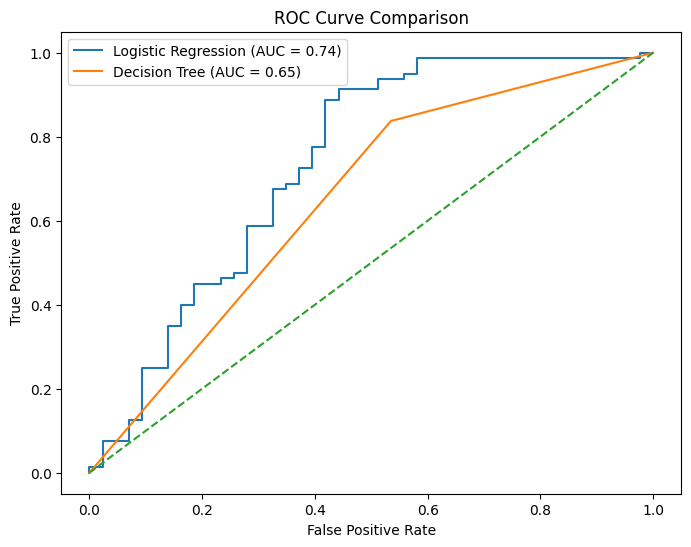

In [20]:
# ROC Curve Comparison between Logistic Regression and Decision Tree
plt.figure(figsize=(8,6))

plt.plot(fpr_log, tpr_log,
         label=f"Logistic Regression (AUC = {roc_auc_log:.2f})")

plt.plot(fpr_tree, tpr_tree,
         label=f"Decision Tree (AUC = {roc_auc_tree:.2f})")

plt.plot([0,1], [0,1], linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

## Conclusion
Logistic Regression outperformed Decision Tree with higher accuracy and ROC-AUC score. Statistical tests revealed that Education significantly influences loan approval, while ApplicantIncome does not show a significant difference. The integrated statistical and ML approach provides an effective framework for financial loan prediction.
